In [3]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
#sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [4]:
from psikit import Psikit

In [8]:
#pk = Psikit()
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [12]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
"""
This jupyter notebook should be run at 8GB Memory, if the memory is limited"
Then in the next cell  "pk.optimize()" would though an error:
    The kernel appears to have died. It will restart automatically.
"""
pk.optimize()

Optimizer: Optimization complete!


-676.3571176592588

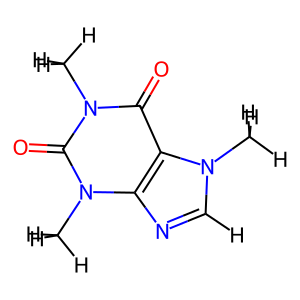

In [13]:
pk.mol

In [14]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.2007772   0.07076464  0.08501985 -0.47143435  0.12600475 -0.10081423
  0.36323573 -0.49566835 -0.04585341  0.36242925 -0.52853222  0.02495539
  0.00600463 -0.03370639  0.11020505  0.11020505  0.11020505  0.17300422
  0.05006122  0.05006122  0.05006122  0.06152295  0.06152295  0.06152295]
[-0.1140366  -0.69387261  0.38638761 -0.62282769  0.63500359  0.09327061
  0.89980082 -0.63013986 -0.8790781   1.09567349 -0.62723521 -0.87748806
 -0.12041742 -0.12349402  0.12973216  0.16723252  0.16731185  0.18241193
  0.16749715  0.14893393  0.14892534  0.14560689  0.14561406  0.1751876 ]
[-0.13210157 -0.05231956  0.07733232 -0.27541603  0.13960092 -0.12551266
  0.29395717 -0.39449297 -0.18832767  0.34851696 -0.39857664 -0.15253217
 -0.13203399 -0.13824787  0.10405664  0.11674277  0.11779363  0.12134244
  0.11931975  0.10838836  0.10771893  0.10709083  0.10599239  0.12170803]


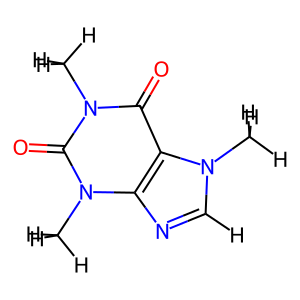

In [15]:
mol = pk.mol
atoms = mol.GetAtoms()
mol

In [16]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [17]:
df = pd.DataFrame(data)

In [18]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.126
6,C,0.363,0.900,0.294
7,O,-0.496,-0.630,-0.394
8,N,-0.046,-0.879,-0.188
9,C,0.362,1.096,0.349


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
plt.style.use('ggplot')

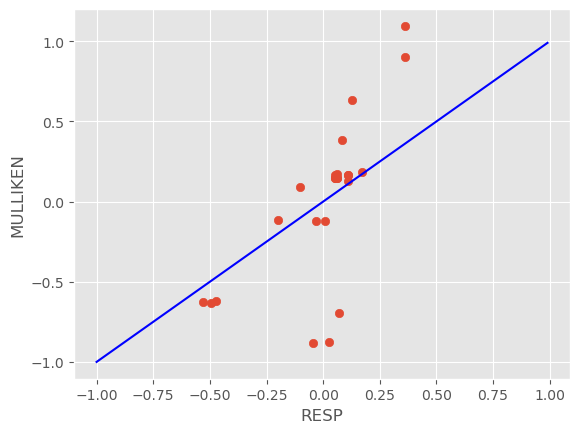

In [21]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

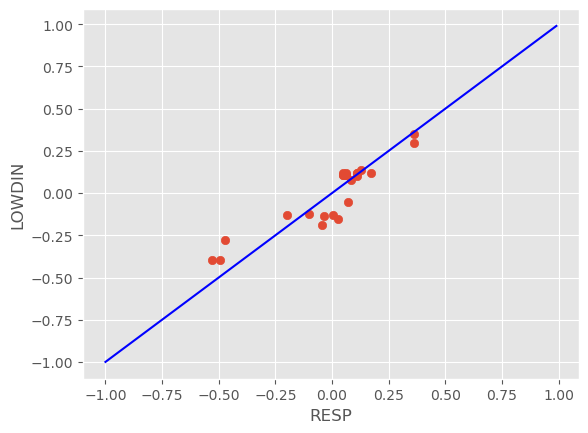

In [22]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

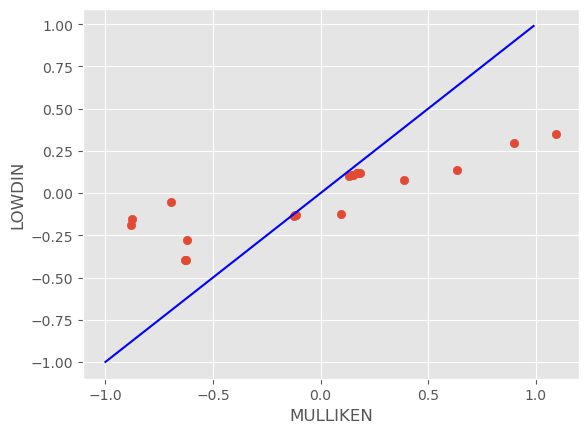

In [23]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300

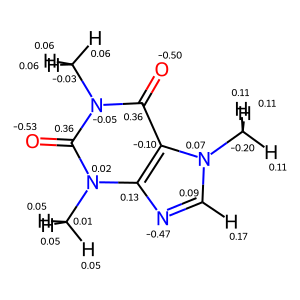

In [25]:
for at in pk.mol.GetAtoms():
    lbl = '%.2f'%(float(at.GetProp("RESP")))
    at.SetProp('atomNote',lbl)
mol